# A2 - Validación de un Modelo de Regresión Lineal Múltiple

## Instrucciones:
Para el dataset de "auto-mpg.csv" (disponible en en apartado DATASETS del tema) generar un modelo de regresión lineal múltiple que permita predecir el desempeño en millas por galón (mpg) de algún vehículo, utilizando como variables predictoras cylinders, displacement, horsepower, weight, y acceleration, y validar el modelo generado siguiendo los siguientes criterios:

1. Para este ejercicio, deberá particionar el dataset en dos conjuntos (Conjunto de Entrenamiento y de Prueba). La delimitación de estos conjuntos deberá hacerse de manera que no exista sesgo en la elección de sus elementos.

2. Utilizar el conjunto de entrenamiento generado para construir el modelo de regresión lineal, tomando nota de los parámetros obtenidos y del valor del coeficiente de determinación (R^2)

3. Para hacer la validación del modelo deberá utilizar el conjunto delimitado como datos de prueba, y deberá aplicar la métrica del Error Estándar Residual (RSE) para evaluarlo.

4. Finalmente deberá responder las siguientes preguntas:

- ¿Qué tan buena es la bondad de ajuste de su modelo de regresión respecto al conjunto de datos de entrenamiento que delimitó?
- ¿Qué tan buenas son las predicciones generadas por su modelo de acuerdo a las métricas aplicada para evaluarlo?
- De entre las variables utilizadas ¿Cuáles son las tres más importantes para el modelo de regresión propuesto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../../datasets/auto/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["mpg"] = df["mpg"].fillna(df["mpg"].mean())

Text(0.5, 1.0, 'HP vs MPG')

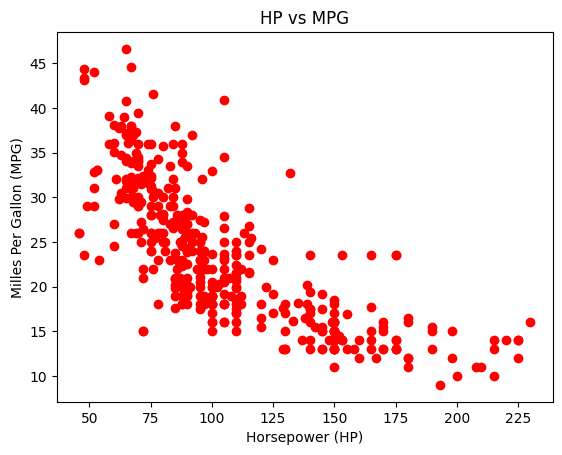

In [4]:
%matplotlib inline
plt.plot(df["horsepower"], df["mpg"], "ro")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Milles Per Gallon (MPG)")
plt.title("HP vs MPG")

## Dividir el dataset en train y test

In [5]:
df_train = df.sample(frac=0.7)
df_test = df.drop(df_train.index)

In [6]:
X_train = df_train[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
Y_train = df_train["mpg"]

X_test = df_test[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
Y_test = df_test["mpg"]

In [7]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((284, 5), (284,), (122, 5), (122,))

## Aplicando Regresión Lineal con las variables seleccionadas

In [8]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_train)

In [9]:
lm.score(X_test,Y_test)

0.717547261251574

In [10]:
Y_test_pred = lm.predict(X_test)

In [11]:
# Calcular SSD y RSE
SSD = np.sum((Y_test-Y_test_pred)**2)
RSE = np.sqrt(SSD/(len(X_test)-1))
# Calcular RSE_%
y_mean = np.mean(Y_test)
RSE_rate = RSE/y_mean
print("SSD = ",SSD)
print("RSE = ",RSE)
print("RSE_% = ",RSE_rate)

SSD =  1947.8937471244258
RSE =  4.01226811551526
RSE_% =  0.16751204461574487


## Matriz de correlación para selección de variables

In [12]:
df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "mpg"]].corr()

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.951787,0.840140,0.895220,-0.522452,-0.762698
displacement,0.951787,1.000000,0.894719,0.932475,-0.557984,-0.791268
horsepower,0.840140,0.894719,1.000000,0.862617,-0.692274,-0.758059
weight,0.895220,0.932475,0.862617,1.000000,-0.430086,-0.823327
acceleration,-0.522452,-0.557984,-0.692274,-0.430086,1.000000,0.409338
mpg,-0.762698,-0.791268,-0.758059,-0.823327,0.409338,1.000000


In [13]:
columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

In [14]:
# Prueba de modelo columna por columna
for col in columns:
    X = X_train[[col]]
    Y = Y_train
    lm = LinearRegression()
    lm.fit(X,Y)
    score = lm.score(X,Y)
    print(f"Using only {col}, R^2: {score}")

Using only cylinders, R^2: 0.5610789777488763
Using only displacement, R^2: 0.6034623994799775
Using only horsepower, R^2: 0.5623963076685169
Using only weight, R^2: 0.6623826782140168
Using only acceleration, R^2: 0.1709331793401122


## Probando solo con Cylinders, Displacement y Weight

In [15]:
X_train = df_train[["cylinders", "displacement", "weight"]]
Y_train = df_train["mpg"]

X_test = df_test[["cylinders", "displacement", "weight"]]
Y_test = df_test["mpg"]

In [16]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_train)

In [17]:
lm.score(X_test,Y_test)

0.721616420274449

In [18]:
Y_test_pred = lm.predict(X_test)

In [19]:
# Calcular SSD y RSE
SSD = np.sum((Y_test-Y_test_pred)**2)
RSE = np.sqrt(SSD/(len(X_test)-1))
# Calcular RSE_%
y_mean = np.mean(Y_test)
RSE_rate = RSE/y_mean
print("SSD = ",SSD)
print("RSE = ",RSE)
print("RSE_% = ",RSE_rate)

SSD =  1919.8313907392994
RSE =  3.9832618706377882
RSE_% =  0.1663010349707859


## Respuesta a las preguntas

- ¿Qué tan buena es la bondad de ajuste de su modelo de regresión respecto al conjunto de datos de entrenamiento que delimitó?


- ¿Qué tan buenas son las predicciones generadas por su modelo de acuerdo a las métricas aplicada para evaluarlo?


- De entre las variables utilizadas ¿Cuáles son las tres más importantes para el modelo de regresión propuesto?